In [118]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import seaborn as sns
#Visualizar o diretório atual
print(os.getcwd().split("/")[-1])

notebooks


### Dataset escolhido no moodle: dados_banco.csv

In [ ]:
df = pd.read_csv("../dataset/dados_banco.csv")
df.head()


,Unnamed: 0,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
0,75928,75928,M,32,Privada,5719.00,933.79,0.0,0.0,6023.68,0
1,52921,52921,F,28,Privada,5064.00,628.37,0.0,0.0,1578.24,0
2,8387,8387,F,24,Autônomo,4739.00,889.18,0.0,0.0,2578.70,0
3,54522,54522,M,30,Pública,5215.00,1141.47,0.0,0.0,4348.96,0
4,45397,45397,M,30,Autônomo,5215.56,520.70,0.0,0.0,1516.78,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   Cliente             10000 non-null  int64  
 2   Sexo                10000 non-null  object 
 3   Idade               10000 non-null  int64  
 4   Empresa             10000 non-null  object 
 5   Salario             10000 non-null  float64
 6   Saldo_cc            10000 non-null  float64
 7   Saldo_poupança      10000 non-null  float64
 8   Saldo_investimento  10000 non-null  float64
 9   Devedor_cartao      10000 non-null  float64
 10  Inadimplente        10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.5+ KB


### Tratamento de linhas nulas e duplicadas

In [121]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   Cliente             10000 non-null  int64  
 2   Sexo                10000 non-null  object 
 3   Idade               10000 non-null  int64  
 4   Empresa             10000 non-null  object 
 5   Salario             10000 non-null  float64
 6   Saldo_cc            10000 non-null  float64
 7   Saldo_poupança      10000 non-null  float64
 8   Saldo_investimento  10000 non-null  float64
 9   Devedor_cartao      10000 non-null  float64
 10  Inadimplente        10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.5+ KB


### Começando análise exploratória dos dados

In [122]:
df = df.select_dtypes(include=['number'])
matriz_correlacao = df.corr()

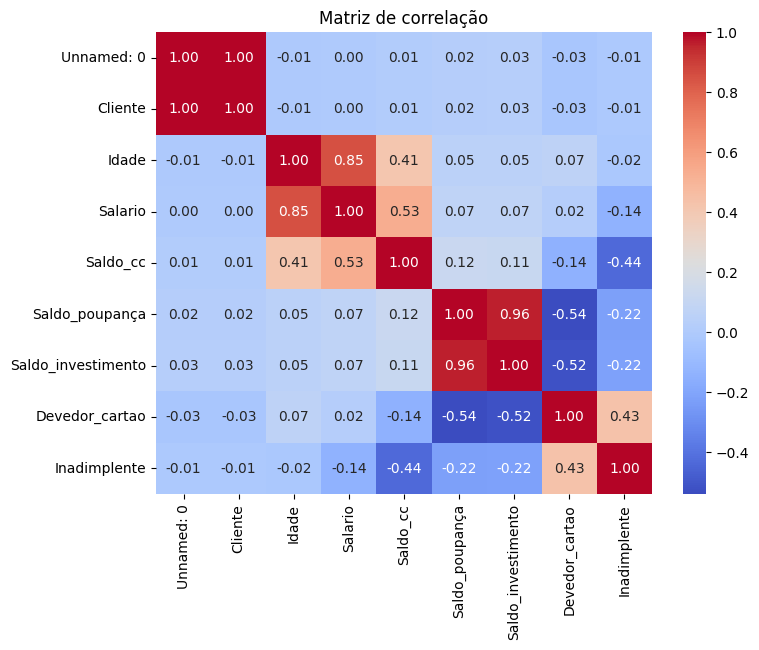

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()

### Escolha das variáveis
##### x -> idade
##### y -> Salário

---

##### A) Média, variância, desvio padrão e mediana para x e y

In [124]:
print(f"Média das idades -> {round(df["Idade"].mean(), 0)}")
print(f"Variância das idades -> {round(df["Idade"].var(), 0)}")
print(f"Desvio padrão das Idades -> {round(df["Idade"].std(), 0)} ")
print(f"Mediana das idades -> {round(df["Idade"].median(), 2)}")
print("-" * 100)

print(f"Média dos salários -> {round(df["Salario"].mean(), 2)}")
print(f"Variância dos salários -> {round(df["Salario"].var(), 2)}")
print(f"Desvio padrão dos salários -> {round(df["Salario"].std(), 2)} ")
print(f"Mediana dos salários -> {df["Salario"].median()}")

Média das idades -> 32.0
Variância das idades -> 9.0
Desvio padrão das Idades -> 3.0 
Mediana das idades -> 32.0
----------------------------------------------------------------------------------------------------
Média dos salários -> 5482.88
Variância dos salários -> 155062.25
Desvio padrão dos salários -> 393.78 
Mediana dos salários -> 5498.78


##### B) O histograma de x e y. 

Histograma de x:

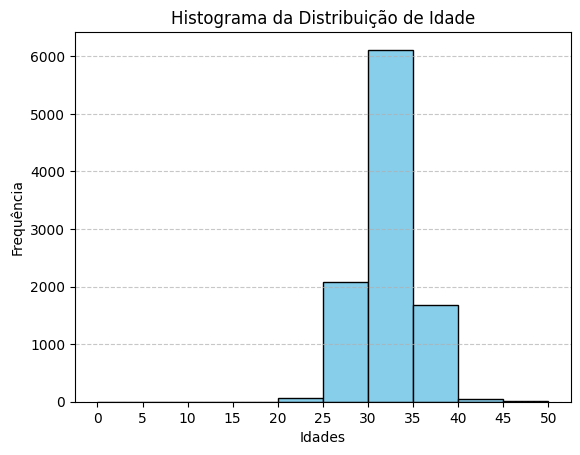

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0, df["Idade"].max() + 5, 5)  # intervalos de 5 em 5 anos

plt.hist(df["Idade"], bins=bins, color='skyblue', edgecolor='black')
plt.title('Histograma da Distribuição de Idade')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Histograma de y:

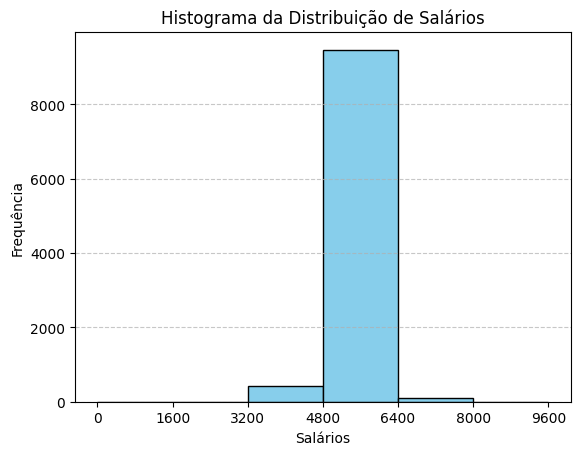

In [134]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0, df["Salario"].max()+ 1600, 1600)

plt.hist(df["Salario"], bins=bins, color='skyblue', edgecolor='black')
plt.title('Histograma da Distribuição de Salários')
plt.xlabel('Salários')
plt.ylabel('Frequência')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### C) O boxplot de x e y. 

Boxplot de x:

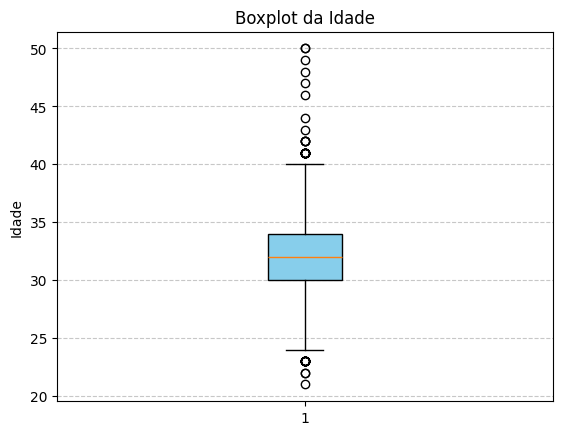

In [129]:
import matplotlib.pyplot as plt

plt.boxplot(df["Idade"], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Boxplot da Idade")
plt.ylabel("Idade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Boxplot de y:

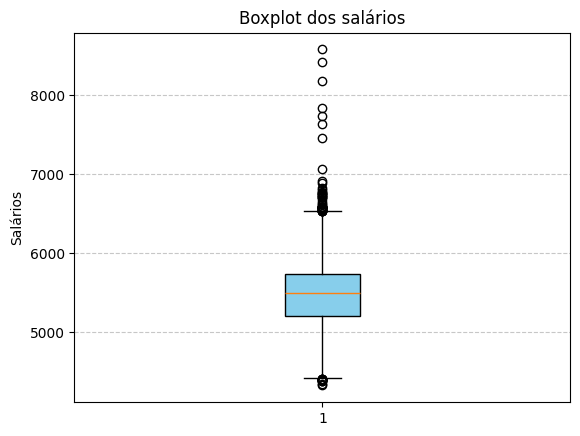

In [130]:
import matplotlib.pyplot as plt

plt.boxplot(df["Salario"], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Boxplot dos salários")
plt.ylabel("Salários")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()